# CS 4650 - Capstone Project

### Jeremy Embar, Timothy Huang, Michael Left, Dante Martinez
### Cal Poly Pomona 2023-05-11

Analyzing Boston Marathon Winners

### Necessary imports and settings

In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('display.max_columns', 50)
np.set_printoptions(precision=4, suppress=True)

### Loading the data
Loading the data for both men and women into dataframes.

In [17]:
data_m = pd.read_csv('Mens_Boston_Marathon_Winners.csv')
data_f = pd.read_csv('Womens_Boston_Marathon_Winners.csv')

In [18]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              124 non-null    float64
 1   Winner            124 non-null    object 
 2   Country           124 non-null    object 
 3   Time              124 non-null    object 
 4   Distance (Miles)  124 non-null    float64
 5   Distance (KM)     124 non-null    float64
dtypes: float64(3), object(3)
memory usage: 6.0+ KB


In [19]:
data_m.tail()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
121,2018.0,Yuki Kawauchi,Japan,02:15:58,26.2,42.2
122,2019.0,Lawrence Cherono,Kenya,02:07:57,26.2,42.2
123,NaN,NaN,NaN,NaN,NaN,NaN
124,2021.0,Benson Kipruto,Kenya,02:09:51,26.2,42.2
125,2022.0,Evans Chebet,Kenya,02:06:51,26.2,42.2


Checking for NaN values and dropping the rows that are missing.

In [20]:
data_m['Year'].isna().sum()

2

In [21]:
data_f['Year'].isna().sum()

1

Dropping all the NaN values from the Men and Womens marathon tables.

In [22]:
data_m.dropna(inplace=True)
data_f.dropna(inplace=True)

Creating a new column for Speed (MPH) and calculating those values

In [23]:

data_m['Speed (MPH)'] = pd.to_datetime(data_m['Time'], format= '%H:%M:%S')
data_m['Speed (MPH)'] = data_m['Speed (MPH)'].dt.hour + data_m['Speed (MPH)'].dt.minute/60 + data_m['Speed (MPH)'].dt.second/3600
data_m['Speed (MPH)'] = data_m['Distance (Miles)'] / data_m['Speed (MPH)']

In [24]:
data_f['Speed (MPH)'] = pd.to_datetime(data_f['Time'], format= '%H:%M:%S')
data_f['Speed (MPH)'] = data_f['Speed (MPH)'].dt.hour + data_f['Speed (MPH)'].dt.minute/60 + data_f['Speed (MPH)'].dt.second/3600
data_f['Speed (MPH)'] = data_f['Distance (Miles)'] / data_f['Speed (MPH)']

Dropping the Distance in KMs because it is redundant when we already have the Distance in miles

In [25]:
data_m.drop('Distance (KM)', axis = 1, inplace=True)
data_f.drop('Distance (KM)', axis = 1, inplace=True)

In [26]:
data_f.tail()

,Year,Winner,Country,Time,Distance (Miles),Speed (MPH)
51,2017.0,Edna Kiplagat,Kenya,2:21:52,26.2,11.080827
52,2018.0,Desiree Linden,United States,2:39:54,26.2,9.831144
53,2019.0,Worknesh Degefa,Ethiopia,2:23:31,26.2,10.953432
55,2021.0,Edna Kiplagat,Kenya,2:25:09,26.2,10.830176
56,2022.0,Peres Jepchirchir,Kenya,2:21:02,26.2,11.146301


### Plotting Male vs Female Speeds Over Time

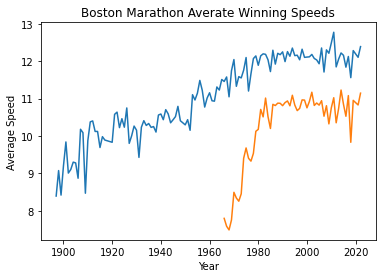

In [27]:
# Create line plot for male winners
sns.lineplot(x='Year', y='Speed (MPH)', data=data_m)

# Create line plot for female winners
sns.lineplot(x='Year', y='Speed (MPH)', data=data_f)

# Set plot title and axis labels
plt.title('Boston Marathon Averate Winning Speeds')
plt.xlabel('Year')
plt.ylabel('Average Speed')

# Show the plot
plt.show()


### Plotting Repeat Winners Over Time

No handles with labels found to put in legend.


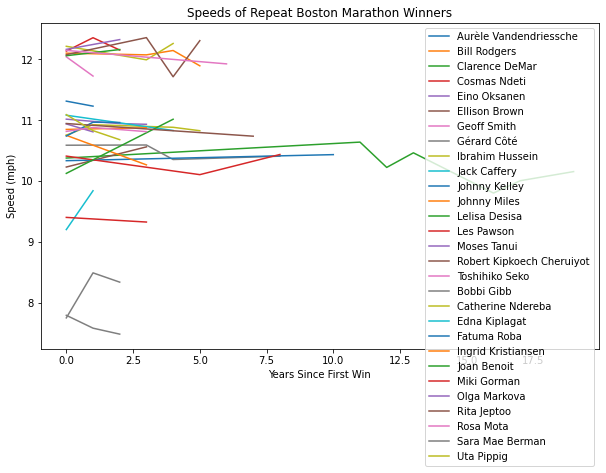

In [28]:
#winners = pd.concat([data_m, data_f])
data_f["years_since_first_win"] = data_f.groupby("Winner")["Year"].transform(lambda x: x - x.min())

data_m["years_since_first_win"] = data_m.groupby("Winner")["Year"].transform(lambda x: x - x.min())

repeat_winners_m = data_m.groupby("Winner").filter(lambda x: len(x) > 1)
repeat_winners_f = data_f.groupby("Winner").filter(lambda x: len(x) > 1)

plt.figure(figsize=(10, 6))
plt.legend(loc="upper left", fontsize=8)

for name, group in repeat_winners_m.groupby("Winner"):
    plt.plot(group["years_since_first_win"], group["Speed (MPH)"], label=name)
for name, group in repeat_winners_f.groupby("Winner"):
    plt.plot(group["years_since_first_win"], group["Speed (MPH)"], label=name)
plt.xlabel("Years Since First Win")
plt.ylabel("Speed (mph)")
plt.title("Speeds of Repeat Boston Marathon Winners")
plt.legend()
plt.show()